In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pm-101399607-at-11-19-2025-05-23-15/__script__.py
/kaggle/input/pm-101399607-at-11-19-2025-05-23-15/xyzservices-2025.10.0-py3-none-any.whl
/kaggle/input/pm-101399607-at-11-19-2025-05-23-15/kiwisolver-1.4.9-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl
/kaggle/input/pm-101399607-at-11-19-2025-05-23-15/numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pm-101399607-at-11-19-2025-05-23-15/gast-0.4.0-py3-none-any.whl
/kaggle/input/pm-101399607-at-11-19-2025-05-23-15/google_auth-2.43.0-py2.py3-none-any.whl
/kaggle/input/pm-101399607-at-11-19-2025-05-23-15/tensorboard-2.12.3-py3-none-any.whl
/kaggle/input/pm-101399607-at-11-19-2025-05-23-15/pyasn1-0.6.1-py3-none-any.whl
/kaggle/input/pm-101399607-at-11-19-2025-05-23-15/typing_extensions-4.15.0-py3-none-any.whl
/kaggle/input/pm-101399607-at-11-19-2025-05-23-15/requests-2.32.5-py3-none-any.whl
/kaggle/input/pm-101399607-at-11-19-2025-05-23-15/keras-2.12.0-py2.py3-none-any.whl
/kaggl

## Employee Attrition Prediction Using Deep Learning

**Predicts employee attrition** using a deep neural network enhanced with SMOTE oversampling, feature scaling, and optimized training, helping HR teams identify high-risk employees and improve retention strategies.

## Load Dataset

In [2]:
dataset = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
import warnings
warnings.filterwarnings("ignore")

**Check shape & info**

In [4]:
dataset.shape

(1470, 35)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Data Cleaning

**Check Missing Values**

In [7]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Check duplicate rows**

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Exploratory Data Analysis

**Drop Unnecessary Columns**

In [10]:
dataset = dataset.drop(["EmployeeCount","EmployeeNumber","Over18","StandardHours"],axis = 1)

In [11]:
dataset["Attrition"] = dataset["Attrition"].apply(lambda x:1 if x == "Yes" else 0 )
dataset["OverTime"] = dataset["OverTime"].apply(lambda x:1 if x== "Yes" else 0)
dataset["Gender"] = dataset["Gender"].apply(lambda x:1 if x == "Male" else 0)

In [12]:
attrition = dataset["Attrition"].value_counts()
print(attrition)

Attrition
0    1233
1     237
Name: count, dtype: int64


In [13]:
stay = round(attrition[0]/dataset["Attrition"].count()*100,2)
leave = round(attrition[1]/dataset["Attrition"].count()*100,2)

print("Percentage of stay :",stay)
print()
print("Percentage of leave :",leave)

Percentage of stay : 83.88

Percentage of leave : 16.12


## Visualization

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

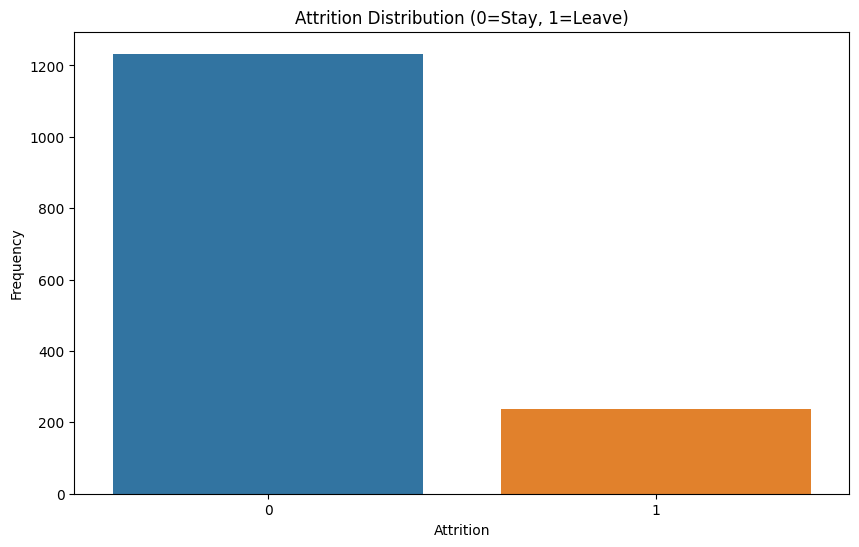

In [15]:
plt.figure(figsize=(10,6))

sns.countplot(x= "Attrition",data = dataset)
plt.title("Attrition Distribution (0=Stay, 1=Leave)")
plt.xlabel("Attrition")
plt.ylabel("Frequency")
plt.show()

**Encode Categorical Columns**

In [16]:
categorical_values = ["BusinessTravel","Department","EducationField","JobRole","MaritalStatus"]

dataset = pd.get_dummies(data = dataset,columns = categorical_values, drop_first = True, dtype=int )

**Move "Attrition" to last column**

In [17]:
dataset["Attrition"] = dataset.pop("Attrition")

**Split dataset into features (x) and target (y)**

In [18]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

**Train Test Split**

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

**Handling Imbalance with SMOTE**

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_resampled, y_resampled = sm.fit_resample(x_train,y_train)

In [21]:
from collections import Counter
print("Before resampling :",Counter(y_train))
print("After Resampling :",Counter(y_resampled))

Before resampling : Counter({0: 978, 1: 198})
After Resampling : Counter({0: 978, 1: 978})


**Feature Scaling**

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_resampled)
x_test_scaled = scaler.transform(x_test)

## Build Deep Learning Mode

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras
from tensorflow.keras.metrics import Recall, Precision

In [24]:
model = Sequential()

model.add(Input(shape=(44,), name = "Input_Layer"))

model.add(Dense(32,activation="relu",name = "Hidden_Layer_1",kernel_regularizer=l2(0.001)))

model.add(Dropout(0.3))
model.add(Dense(16,activation="relu",name = "Hidden_Layer_2",kernel_regularizer=l2(0.001)))

model.add(Dropout(0.3))
model.add(Dense(8,activation="relu",name = "Hidden_Layer_3",kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid",name ="Output_layer"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 32)                1440      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 Hidden_Layer_3 (Dense)      (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 Output_layer (Dense)        (None, 1)                 9

**Compile Model**

In [26]:
optimizer= Adam(learning_rate=0.0001)
model.compile(loss = "binary_crossentropy",optimizer=optimizer,metrics=["accuracy",Precision(),Recall()])

In [27]:
earlystop = EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)

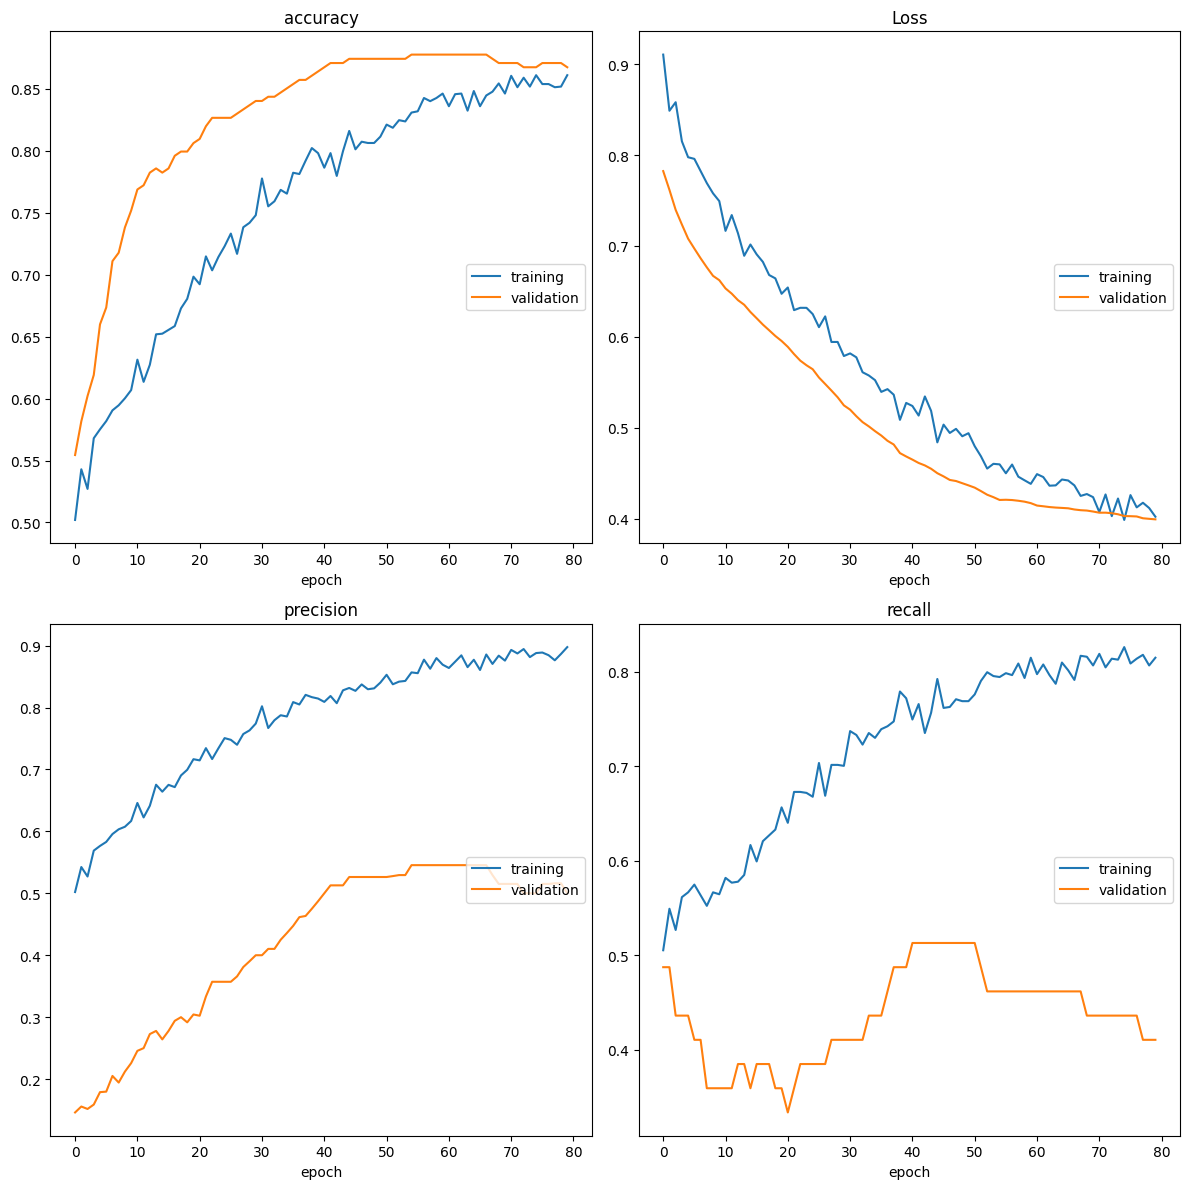

accuracy
	training         	 (min:    0.502, max:    0.861, cur:    0.861)
	validation       	 (min:    0.554, max:    0.878, cur:    0.867)
Loss
	training         	 (min:    0.398, max:    0.911, cur:    0.402)
	validation       	 (min:    0.399, max:    0.782, cur:    0.399)
precision
	training         	 (min:    0.502, max:    0.898, cur:    0.898)
	validation       	 (min:    0.146, max:    0.545, cur:    0.500)
recall
	training         	 (min:    0.505, max:    0.826, cur:    0.815)
	validation       	 (min:    0.333, max:    0.513, cur:    0.410)
49/49 [==============================] - 1s 25ms/step - loss: 0.4020 - accuracy: 0.8609 - precision: 0.8975 - recall: 0.8149 - val_loss: 0.3991 - val_accuracy: 0.8673 - val_precision: 0.5000 - val_recall: 0.4103


In [28]:
history = model.fit(x_train_scaled, y_resampled,epochs=80,batch_size=40,validation_data=(x_test_scaled,y_test),callbacks=[PlotLossesKeras(),earlystop])

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [30]:
y_pred = (model.predict(x_test_scaled) > 0.5).astype("int32")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))

10/10 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[239  16]
 [ 23  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       255
           1       0.50      0.41      0.45        39

    accuracy                           0.87       294
   macro avg       0.71      0.67      0.69       294
weighted avg       0.86      0.87      0.86       294


ROC-AUC Score: 0.6737556561085972


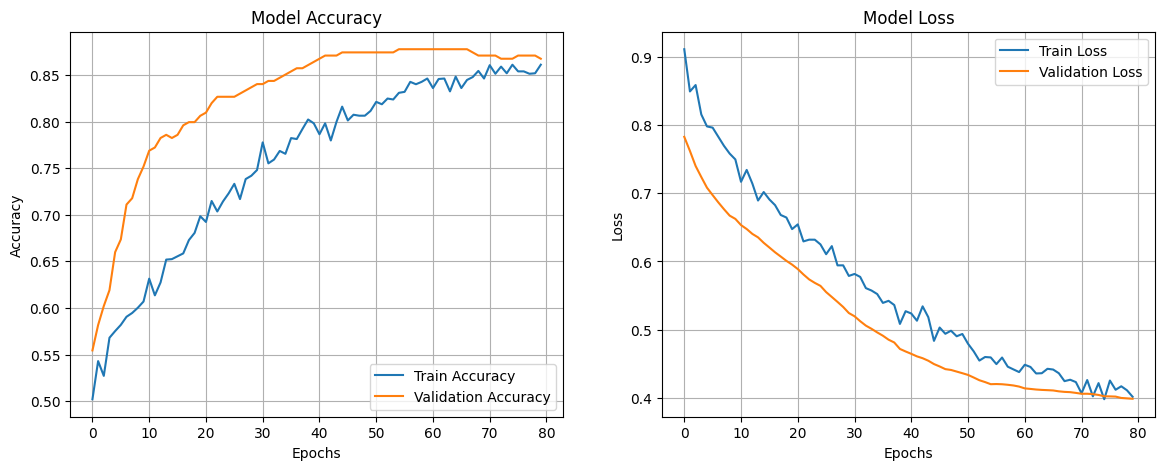

In [31]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()